In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

Key meta data

In [2]:
root_path = "D:/GeoData/"


LReg_Filename = "pp-monthly-update-new-version.csv"
LReg_Names = ['Transaction_unique_identifier', 'Price', 'Date_of_Transfer', 'Postcode', 'Property_Type', 'Old_New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town_City', 'District', 'County', 'PPDCategory_Type', 'Record_Status_monthly_file_only']

Land Registry Data

In [3]:
LReg_Data = pd.read_csv(root_path + LReg_Filename, names = LReg_Names) 

data.info()
#data.describe(include='all')
#data.corr()
data['Property_Type'].value_counts()

Some Cleaning

In [4]:
#Make the date into a date
LReg_Data['Date_of_Transfer'] = pd.to_datetime(LReg_Data['Date_of_Transfer'], errors='ignore')

#Calculate the year of transfer
LReg_Data["Year_Of_Transfer"] = pd.DatetimeIndex(LReg_Data['Date_of_Transfer']).year

#remove the spaces from the postcode
LReg_Data["Postcode_NS"] = LReg_Data["Postcode"].astype(str).str.replace(" ","")

#Cols to keep
keep_cols = ['Price', 'Date_of_Transfer', 'Year_Of_Transfer', 'Postcode_NS', 'Property_Type', 'Old_New', 'Duration']
LReg_Data = LReg_Data.loc[:,keep_cols]

In [5]:
LReg_Data.head()

,Price,Date_of_Transfer,Year_Of_Transfer,Postcode_NS,Property_Type,Old_New,Duration
0,860000,2002-11-29,2002,W84HY,F,N,L
1,69950,2002-05-09,2002,TR138JJ,T,N,F
2,62000,2002-01-11,2002,TR138JH,T,N,F
3,73500,2002-04-30,2002,TR138JH,T,N,F
4,68500,2002-04-19,2002,TR138JH,T,N,F


National statistics postcode lookup file and references

In [44]:
NSPL_Dir = "NSPL_NOV_2020_UK/"
NSPL_Filename = "Data/NSPL_NOV_2020_UK.csv"

NSPL_Data = pd.read_csv(root_path + NSPL_Dir + NSPL_Filename, low_memory = False) 

#Not keeping all of the columns, for fairly arbitrary reasons
keep_cols = ['pcd', 'oseast1m', 'osnrth1m', 'osgrdind', 'oa11', 'cty', 'ced', 'laua', 'ward', 'hlthau', 'nhser', 'ctry', 'rgn', 'pcon', 'teclec', 'ttwa', 'pct', 'nuts', 'park', 'lsoa11', 'msoa11', 'ccg', 'bua11', 'buasd11', 'ru11ind', 'pfa', 'calncv', 'stp', 'imd']  
NSPL_Data = NSPL_Data.loc[:,keep_cols]

In [46]:
NSPL_Data["Postcode_NS"] = NSPL_Data["pcd"].astype(str).str.replace(" ","")

In [47]:
def getlookup(filename, keep):
    lookup = pd.read_csv(root_path + NSPL_Dir + "Documents/" + filename)
    lookup = lookup.loc[:,keep]
    return lookup

In [48]:
oa11 = getlookup('2011 Census Output Area Classification Names and Codes UK.csv', ['OAC11', 'Supergroup', 'Group', 'Subgroup'])
cty = getlookup('County names and codes UK as at 04_20_NSPL.csv', ['CTY20CD', 'CTY20NM'])
ced = getlookup('County Electoral Division names and codes EN as at 12_17.csv', ['CED17CD', 'CED17NM'])
laua = getlookup('LA_UA names and codes UK as at 04_20.csv', ['LAD20CD', 'LAD20NM'])
ward = getlookup('Ward names and codes UK as at 12_19.csv', ['WD19CD', 'WD19NM'])
hlthau = getlookup('HLTHAU names and codes UK as at 04_19.csv', ['HLTHAUCD', 'HLTHAUNM'])
nhser = getlookup('NHSER names and codes EN as at 04_19.csv', ['NHSER19CD', 'NHSER19NM'])
ctry = getlookup('Country names and codes UK as at 08_12.csv', ['CTRY12CD', 'CTRY12NM'])
rgn = getlookup('Region names and codes EN as at 12_10 (GOR).csv', ['GOR10CD', 'GOR10NM', 'GOR10NMW', 'GOR10CDO'])
pcon = getlookup('Westminster Parliamentary Constituency names and codes UK as at 12_14.csv', ['PCON14CD', 'PCON14NM'])
teclec = getlookup('TECLEC names and codes UK as at 12_16.csv', ['TECLECCD', 'TECLECNM', 'TECLECCDO'])
ttwa = getlookup('TTWA names and codes UK as at 12_11 v5.csv', ['TTWA11CD', 'TTWA11NM'])
pct = getlookup('PCT names and codes UK as at 04_19.csv', ['PCTCD', 'PCTNM', 'PCTCDO'])
nuts = getlookup('LAU2 names and codes UK as at 12_18.csv', ['LAU218CD', 'LAU218NM'])
park = getlookup('National Park names and codes GB as at 08_16.csv', ['NPARK16CD', 'NPARK16NM'])
lsoa11 = getlookup('LSOA (2011) names and codes UK as at 12_12.csv', ['LSOA11CD', 'LSOA11NM'])
msoa11 = getlookup('MSOA (2011) names and codes UK as at 12_12.csv', ['MSOA11CD', 'MSOA11NM'])
ccg = getlookup('CCG names and codes UK as at 04_20.csv', ['CCG20CD', 'CCG20NM', 'CCG20CDH', 'CCG20NMW'])
bua11 = getlookup('BUA_names and codes UK as at 12_13.csv', ['BUA13CD', 'BUA13NM'])
buasd11 = getlookup('BUASD_names and codes UK as at 12_13.csv', ['BUASD13CD', 'BUASD13NM'])
ru11ind = getlookup('Rural Urban (2011) Indicator names and codes GB as at 12_16.csv', ['RU11IND', 'RU11NM'])
pfa = getlookup('PFA names and codes GB as at 12_15.csv', ['PFA15CD', 'PFA15NM'])
calncv     = getlookup('CALNCV names and codes EN as at 07_18.csv', ['CALNCV18CD', 'CALNCV18NM'])
stp = getlookup('STP names and codes EN as at 04_20.csv', ['STP20CD', 'STP20NM', 'STP20CDH'])

In [49]:
NSPL_Data = NSPL_Data.merge(oa11, left_on='oa11', right_on='OAC11', how='left')
NSPL_Data = NSPL_Data.merge(cty, left_on='cty', right_on='CTY20CD', how='left')
NSPL_Data = NSPL_Data.merge(ced, left_on='ced', right_on='CED17CD', how='left')
NSPL_Data = NSPL_Data.merge(laua, left_on='laua', right_on='LAD20CD', how='left')
NSPL_Data = NSPL_Data.merge(ward, left_on='ward', right_on='WD19CD', how='left')
NSPL_Data = NSPL_Data.merge(hlthau, left_on='hlthau', right_on='HLTHAUCD', how='left')
NSPL_Data = NSPL_Data.merge(nhser, left_on='nhser', right_on='NHSER19CD', how='left')
NSPL_Data = NSPL_Data.merge(ctry, left_on='ctry', right_on='CTRY12CD', how='left')
NSPL_Data = NSPL_Data.merge(rgn, left_on='rgn', right_on='GOR10CD', how='left')
NSPL_Data = NSPL_Data.merge(pcon, left_on='pcon', right_on='PCON14CD', how='left')
NSPL_Data = NSPL_Data.merge(teclec, left_on='teclec', right_on='TECLECCD', how='left')
NSPL_Data = NSPL_Data.merge(ttwa, left_on='ttwa', right_on='TTWA11CD', how='left')
NSPL_Data = NSPL_Data.merge(pct, left_on='pct', right_on='PCTCD', how='left')
NSPL_Data = NSPL_Data.merge(nuts, left_on='nuts', right_on='LAU218CD', how='left')
NSPL_Data = NSPL_Data.merge(park, left_on='park', right_on='NPARK16CD', how='left')
NSPL_Data = NSPL_Data.merge(lsoa11, left_on='lsoa11', right_on='LSOA11CD', how='left')
NSPL_Data = NSPL_Data.merge(msoa11, left_on='msoa11', right_on='MSOA11CD', how='left')
NSPL_Data = NSPL_Data.merge(ccg, left_on='ccg', right_on='CCG20CD', how='left')
NSPL_Data = NSPL_Data.merge(bua11, left_on='bua11', right_on='BUA13CD', how='left')
NSPL_Data = NSPL_Data.merge(buasd11, left_on='buasd11', right_on='BUASD13CD', how='left')
NSPL_Data = NSPL_Data.merge(ru11ind, left_on='ru11ind', right_on='RU11IND', how='left')
NSPL_Data = NSPL_Data.merge(pfa, left_on='pfa', right_on='PFA15CD', how='left')
NSPL_Data = NSPL_Data.merge(calncv , left_on='calncv', right_on='CALNCV18CD', how='left')
NSPL_Data = NSPL_Data.merge(stp, left_on='stp', right_on='STP20CD', how='left')

In [56]:
NSPL_RawNames = ['OAC11', 'CTY20CD', 'CED17CD', 'LAD20CD', 'WD19CD', 'HLTHAUCD', 'NHSER19CD', 'CTRY12CD', 'GOR10CD', 'PCON14CD', 'TECLECCD', 'TTWA11CD', 'PCTCD', 'LAU218CD', 'NPARK16CD', 'LSOA11CD', 'MSOA11CD', 'CCG20CD', 'BUA13CD', 'BUASD13CD', 'RU11IND', 'PFA15CD', 'CALNCV18CD', 'STP20CD']
NSPL_LookupNames = ['Supergroup', 'Group', 'Subgroup', 'CTY20NM', 'CED17NM', 'LAD20NM', 'WD19NM', 'HLTHAUNM', 'NHSER19NM', 'CTRY12NM', 'GOR10NM', 'GOR10NMW', 'GOR10CDO', 'PCON14NM', 'TECLECNM', 'TECLECCDO', 'TTWA11NM', 'PCTNM', 'PCTCDO', 'LAU218NM', 'NPARK16NM', 'LSOA11NM', 'MSOA11NM', 'CCG20NM', 'CCG20CDH', 'CCG20NMW', 'BUA13NM', 'BUASD13NM', 'RU11NM', 'PFA15NM', 'CALNCV18NM', 'STP20NM', 'STP20CDH']
Base_Names = ["Postcode_NS", "oseast1m", "osnrth1m"]

NSPL_Data = NSPL_Data.loc[:,Base_Names + NSPL_RawNames + NSPL_LookupNames]

In [57]:
NSPL_Data.head()

,Postcode_NS,oseast1m,osnrth1m,OAC11,CTY20CD,CED17CD,LAD20CD,WD19CD,HLTHAUCD,NHSER19CD,...,CCG20NM,CCG20CDH,CCG20NMW,BUA13NM,BUASD13NM,RU11NM,PFA15NM,CALNCV18NM,STP20NM,STP20CDH
0,AB10AA,385386.0,801193.0,NaN,S99999999,NaN,S12000033,S13002843,S08000020,NaN,...,Aberdeen City Community Health Partnership,012,NaN,(pseudo) Scotland,(pseudo) Scotland,(Scotland) Accessible Small Town,Scotland,NaN,NaN,NaN
1,AB10AB,385177.0,801314.0,NaN,S99999999,NaN,S12000033,S13002843,S08000020,NaN,...,Aberdeen City Community Health Partnership,012,NaN,(pseudo) Scotland,(pseudo) Scotland,(Scotland) Accessible Small Town,Scotland,NaN,NaN,NaN
2,AB10AD,385053.0,801092.0,NaN,S99999999,NaN,S12000033,S13002843,S08000020,NaN,...,Aberdeen City Community Health Partnership,012,NaN,(pseudo) Scotland,(pseudo) Scotland,(Scotland) Accessible Small Town,Scotland,NaN,NaN,NaN
3,AB10AE,384600.0,799300.0,NaN,S99999999,NaN,S12000034,S13002864,S08000020,NaN,...,Aberdeenshire Community Health Partnership,013,NaN,(pseudo) Scotland,(pseudo) Scotland,(Scotland) Accessible Rural,Scotland,NaN,NaN,NaN
4,AB10AF,384460.0,800660.0,NaN,S99999999,NaN,S12000033,S13002843,S08000020,NaN,...,Aberdeen City Community Health Partnership,012,NaN,(pseudo) Scotland,(pseudo) Scotland,(Scotland) Accessible Small Town,Scotland,NaN,NaN,NaN


Combine the two

In [59]:
Combined = LReg_Data.merge(NSPL_Data, left_on = "Postcode_NS", right_on = "Postcode_NS", how='left')

#EPSG:27700

Maps

In [99]:
All_GB = gpd.read_file("D:/GeoData/Countries__December_2019__Boundaries_UK_BFC-shp/Countries__December_2019__Boundaries_UK_BFC.shp")
National_Parks = gpd.read_file("D:/GeoData/National_Parks__December_2019__GB_BFE-shp/National_Parks__December_2019__GB_BFE.shp")
LocalAuthorities = gpd.read_file("D:/GeoData/Local_Authority_Districts__May_2020__Boundaries_UK_BFC-shp/Local_Authority_Districts__May_2020__Boundaries_UK_BFC.shp")
LSOA = gpd.read_file("D:/GeoData/Lower_Layer_Super_Output_Area__December_2011__EW_BSC_V2-shp/Lower_Layer_Super_Output_Area__December_2011__EW_BSC_V2.shp")
GreenSpace = gpd.read_file("D:/GeoData/opgrsp_essh_gb/OS Open Greenspace (ESRI Shape File) GB/data/GB_GreenspaceSite.shp")

In [101]:
Combined_gdf = gpd.GeoDataFrame(Combined, geometry=gpd.points_from_xy(Combined.oseast1m, Combined.osnrth1m))
NSPL_gdf = gpd.GeoDataFrame(NSPL_Data, geometry=gpd.points_from_xy(Combined.oseast1m, Combined.osnrth1m))

In [141]:
Roads_SD = gpd.read_file("D:/GeoData/oproad_essh_gb/data/SD_RoadLink.shp")
Roads_TQ = gpd.read_file("D:/GeoData/oproad_essh_gb/data/TQ_RoadLink.shp")

Roads_List = [Roads_SD, Roads_TQ]

All_Roads = gpd.GeoDataFrame( pd.concat( Roads_List, ignore_index=True) )

Motorway = All_Roads[All_Roads['class'] == "Motorway"]
A_Roads = All_Roads[All_Roads['class'] == "A Road "]
B_Roads = All_Roads[All_Roads['class'] == "B Road"]

Rivers = gpd.read_file("D:/GeoData/oprvrs_essh_gb/data/WatercourseLink.shp")

In [145]:
LocalAuthority = LocalAuthorities[LocalAuthorities["LAD20NM"]=="Bromley"].total_bounds
LSOA_Small = LSOA[LSOA["LSOA11CD"]=="E01019341"].total_bounds

#Keylocations
Byne = [535423, 171150]
Parents = [326877 , 474372]
Office = [532621 , 165313]
StPauls = [532052 , 181145]
ElephantCastle = [531958 , 179077]
M4_junct = [519377 , 178360]

#Square of size (m)
sq_sz = 5000

Use_Loc = M4_junct

Centered = np.array([Use_Loc[0]-(sq_sz/2), Use_Loc[1]-(sq_sz/2), Use_Loc[0]+(sq_sz/2), Use_Loc[1]+(sq_sz/2)])

Map_Of = Centered

C:\Users\richa\Anaconda3\envs\Landreg\lib\site-packages\geopandas\plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

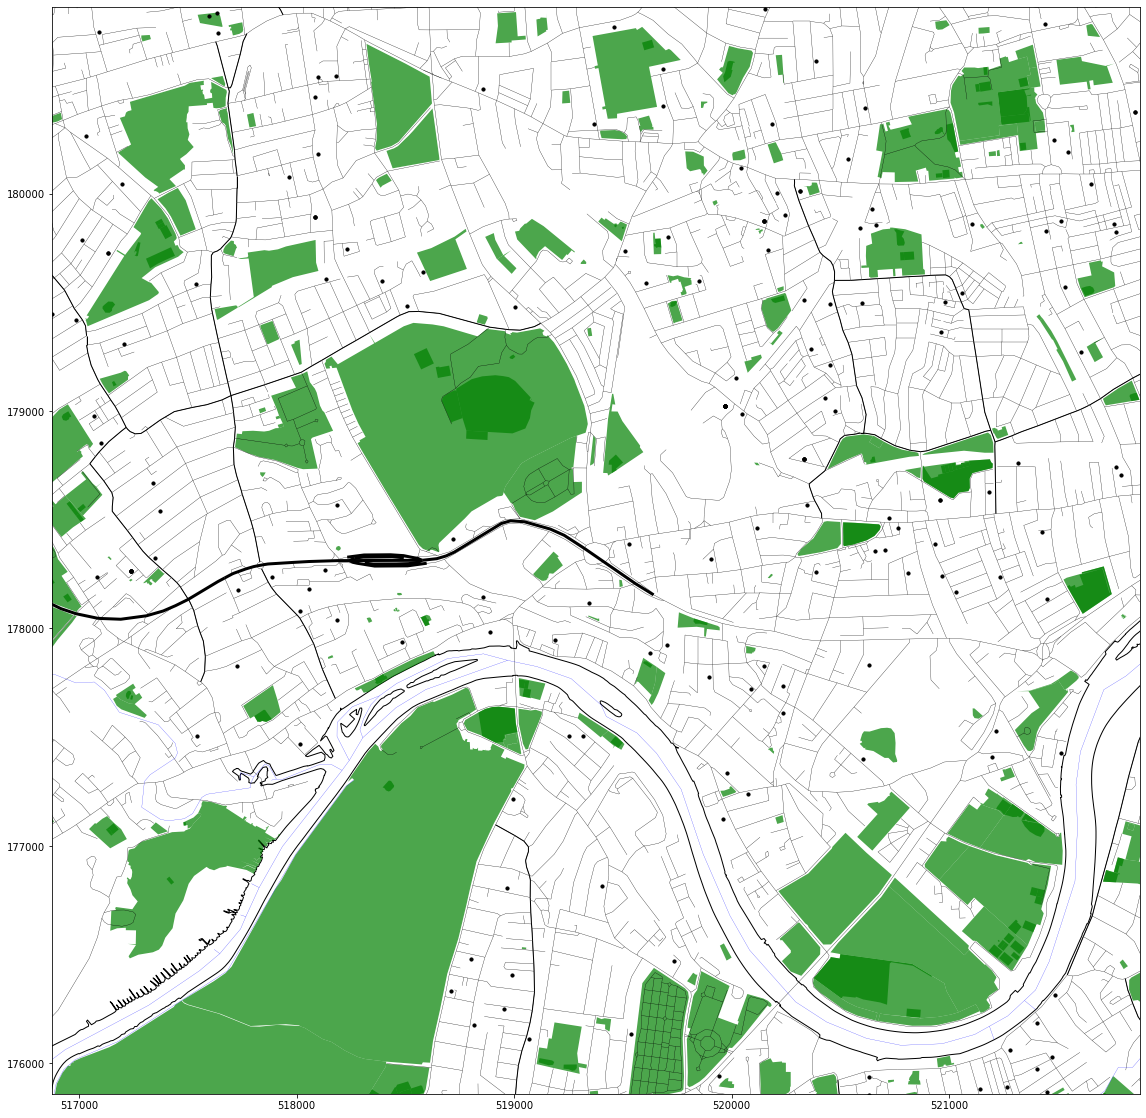

In [147]:
ax =All_GB.plot(figsize=(20,20), color='white', edgecolor='black')

minx, miny, maxx, maxy = Map_Of
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

All_Roads.plot(ax=ax, color='black', linewidth=0.3)
Motorway.plot(ax=ax, color='black', linewidth=3)
A_Roads.plot(ax=ax, color='black', linewidth=2)
B_Roads.plot(ax=ax, color='black', linewidth=1)
Rivers.plot(ax=ax, color='blue', linewidth=0.2, alpha=1)
National_Parks.plot(ax=ax, color='green', alpha=0.5)
GreenSpace.plot(ax=ax, color='green', alpha=0.7)

Combined_gdf.plot(ax=ax, color='black', alpha=1, markersize=10)

#Next tasks

* Blog the above
* Add crashes from stat 19
* Add motorway junctions
* for each sale, get the distance to each motorway junction
* try making a raster map of distance to motorway junction and distance to A road
* try ploting the different road types as different colours

In [136]:
Roads_SD.head()

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
0,false,F31A6387-C40F-424C-993C-DDC462BE9529,Unknown,None,None,None,None,None,Single Carriageway,431,false,false,false,E4DD1FE0-C39D-4919-B833-7464D401862D,91693F1E-5B57-4D71-B073-8793E38BCF3D,None,None,None,Restricted Local Access Road,"LINESTRING Z (305104.030 499843.440 0.000, 305..."
1,false,D798DD8F-6964-464F-BF9C-18B4213F7CF2,Unknown,None,None,None,None,None,Single Carriageway,585,false,false,false,0B275C0A-DEAD-4BD0-92B8-068DF3894FAC,F9AF7951-AEC4-4D0E-B57B-7C31FF1531C3,None,None,None,Restricted Local Access Road,"LINESTRING Z (304839.380 499532.060 0.000, 304..."
2,false,724C7B93-338B-4F9A-92D3-5D9087283A8D,Unknown,None,None,None,None,None,Single Carriageway,509,false,false,false,AC015A87-73A9-459A-8FD4-54F29A12B630,F9AF7951-AEC4-4D0E-B57B-7C31FF1531C3,None,None,None,Restricted Local Access Road,"LINESTRING Z (304863.690 499546.650 0.000, 304..."
3,false,8C5AA21A-761F-4A9F-AF26-50592ADD278C,Unclassified,None,None,None,None,None,Single Carriageway,96,false,false,false,8C8AFBC2-126B-4F03-8A71-1F38F575CD83,E6919F6C-CC41-4582-BB81-118883DED5C9,None,None,None,Local Road,"LINESTRING Z (305704.990 499668.880 0.000, 305..."
4,false,BED895EE-E96A-471D-8E57-6DD2E03AEAB1,B Road,B5344,None,None,None,None,Single Carriageway,189,false,false,false,EE586BFD-89E8-4C78-AF07-D58416A4CD66,8C8AFBC2-126B-4F03-8A71-1F38F575CD83,None,None,osgb4000000007148630,B Road,"LINESTRING Z (305529.180 499735.300 0.000, 305..."


In [144]:
Motorway

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
4366,false,CE0E1E20-989E-4D78-B724-E8D1CADFCBE4,Motorway,M6,None,None,None,None,Collapsed Dual Carriageway,13130,true,true,false,F1156307-85FA-4E4E-9854-12AE641BE8F1,FA37BAAA-4232-43CD-B83A-AC8EF7FBA969,None,None,osgb4000000007855452,Motorway,"LINESTRING Z (359765.370 493242.930 0.000, 359..."
4455,false,888A4F18-1B1C-4A72-B5E0-516C76AE88E8,Motorway,M6,None,None,None,None,Collapsed Dual Carriageway,16,true,true,false,D01D405C-A8CB-476F-A331-DF87AF8E5EFF,F1156307-85FA-4E4E-9854-12AE641BE8F1,None,None,osgb4000000007855452,Motorway,"LINESTRING Z (359757.150 493229.570 0.000, 359..."
4521,false,B3C3FE30-5FC0-454A-A73C-AA8874C75E99,Motorway,M6,None,None,None,None,Collapsed Dual Carriageway,831,true,true,false,FF30CE88-1C82-439A-B28D-CABB3A4966A2,CB86A31C-D4C4-4037-B503-F1225A60B065,None,None,osgb4000000007855452,Motorway,"LINESTRING Z (358311.550 490842.000 0.000, 358..."
6686,false,7203F38D-5F8B-46F3-ACD6-D9AFC1CACC8A,Motorway,M6,None,None,None,None,Slip Road,443,false,true,false,CB86A31C-D4C4-4037-B503-F1225A60B065,A8818D02-48E2-46D7-9821-B7E2F53344B2,None,None,osgb4000000007855452,Motorway,"LINESTRING Z (358640.020 491603.250 0.000, 358..."
6691,false,FC8920F6-5C66-4EE3-A388-E2F86A955A5F,Motorway,M6,None,None,None,None,Collapsed Dual Carriageway,1383,true,true,false,CB86A31C-D4C4-4037-B503-F1225A60B065,FFC9E27D-AD39-446E-A9BF-16D8A02521C5,None,None,osgb4000000007855452,Motorway,"LINESTRING Z (358640.020 491603.250 0.000, 358..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661970,false,FC5467E3-6BBE-4514-83F7-D4810B94EE18,Motorway,M40,None,None,None,None,Collapsed Dual Carriageway,290,true,true,false,907F1994-5115-4BCF-880C-DEC550AE8237,B3F45C68-A669-42AE-BA0B-6DE0D5BE3972,None,None,osgb4000000028063973,Motorway,"LINESTRING Z (500288.260 186051.820 0.000, 500..."
662291,false,70380949-BE99-4AF2-BBB8-FB4DD64351FF,Motorway,M4,None,None,None,None,Collapsed Dual Carriageway,5081,true,true,false,911D3801-7ADD-42C8-B9E1-19AFAF559830,DB063E80-AE29-4C99-942D-CAA77AA7C4D3,None,None,osgb4000000028063972,Motorway,"LINESTRING Z (496539.630 179047.820 0.000, 496..."
662525,false,EC51519D-F9D9-4AAD-A23B-8A00893B9B39,Motorway,M3,None,None,None,None,Collapsed Dual Carriageway,10021,true,true,false,DD917BC3-6955-4D9C-841C-5B586000FFE0,88F5B265-0D06-451C-9237-D05DB4ECD478,None,None,osgb4000000023625256,Motorway,"LINESTRING Z (501147.700 167656.810 0.000, 501..."
663665,false,79484BDB-3DE1-4016-9335-5F6AE24CAEFF,Motorway,M40,None,None,None,None,Collapsed Dual Carriageway,38,true,true,false,907F1994-5115-4BCF-880C-DEC550AE8237,7C9FA62C-C269-4E79-A515-2E1EB9E88BE5,None,None,osgb4000000028063973,Motorway,"LINESTRING Z (500288.260 186051.820 0.000, 500..."


In [137]:
Roads_Node_SD = gpd.read_file("D:/GeoData/oproad_essh_gb/data/SD_RoadNode.shp")

In [138]:
Roads_Node_SD.head()

,identifier,formOfNode,geometry
0,0259AB58-8DEF-460A-B6DC-3C84461744B7,junction,POINT Z (398891.000 499820.000 0.000)
1,5E10E356-394E-4A88-8F24-41C1184E42C9,junction,POINT Z (398907.000 499937.000 0.000)
2,1CB68D2C-2550-4DBE-89B1-37076117C859,junction,POINT Z (346696.000 499446.000 0.000)
3,EF7E8370-CBEE-408B-87A9-3A8AB2D7A6FD,junction,POINT Z (346717.000 499458.000 0.000)
4,E913BEB2-88DC-49A5-9486-09057607FAFE,road end,POINT Z (345010.000 499553.570 0.000)
